# Handwritten Digit Classification using CNN

**Organization:** CodeAlpha  

**Internship Project:** Advanced Task – Image Classification  

**Objective:** Build a Convolutional Neural Network to classify handwritten digits (0–9) from grayscale images. 

The project includes data preprocessing, model training, evaluation, and visualization of predictions.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

2025-08-29 06:13:45.082662: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756448025.332142      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756448025.410233      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load the MNIST dataset

In [4]:
import tensorflow_datasets as tfds

In [5]:
dataset, info = tfds.load('mnist', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

2025-08-29 06:14:52.650933: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Shuffling /root/tensorflow_datasets/mnist/incomplete.OT40QF_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.OT40QF_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
# Access the 'train' and 'test' splits
train_data = dataset['train']
test_data = dataset['test']

# Preprocessing

In [7]:
# Define the preprocessing function
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize image
    label = tf.cast(label, tf.int64)  # Ensure label is int64
    return image, label

# Apply preprocessing, shuffle, and batch the dataset
train_data = train_data.map(preprocess).shuffle(10000).batch(64)
test_data = test_data.map(preprocess).batch(64)

# Build the CNN Model

In [8]:

model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile the model

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

# Training the CNN Model

In [10]:
model.fit(train_data, validation_data=test_data, epochs=5)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 30ms/step - accuracy: 0.8791 - loss: 0.4014 - val_accuracy: 0.9837 - val_loss: 0.0503
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9824 - loss: 0.0557 - val_accuracy: 0.9879 - val_loss: 0.0363
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9884 - loss: 0.0376 - val_accuracy: 0.9835 - val_loss: 0.0514
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9904 - loss: 0.0315 - val_accuracy: 0.9885 - val_loss: 0.0335
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9929 - loss: 0.0223 - val_accuracy: 0.9888 - val_loss: 0.0383


# Evaluate the Model

In [11]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9890 - loss: 0.0347
Test accuracy: 0.9887999892234802


# Save the model 

In [12]:
# Save the trained model
model.save('mnist_model.h5')


# Plotting the Predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step 


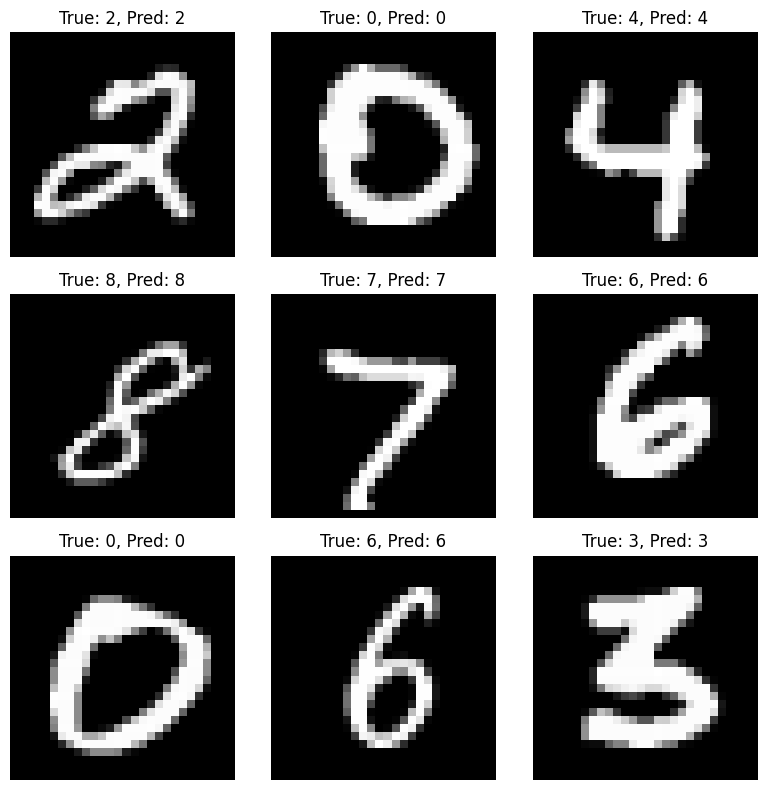

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch from the test dataset
for images, labels in test_data.take(1):  # Take 1 batch
    preds = model.predict(images)  # model predicts batch
    pred_labels = np.argmax(preds, axis=1)  # predicted digits
    images = images.numpy()  # convert from tensor to numpy

# Display first 9 images with predicted and true labels
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"True: {labels[i].numpy()}, Pred: {pred_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
